# Stocastic Gradient Descent

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [5]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

### Make some data

In [6]:
torch.manual_seed(1)

In [7]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

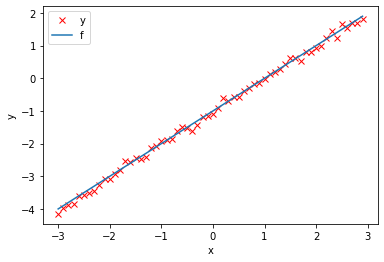

In [8]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Creating the model and total loss function

In [9]:
def forward(x):
    return w*x + b

In [10]:
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [11]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [12]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [13]:
lr = 0.1
LOSS_SGD = []

In [14]:
def train_model_SGD(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            yhat = forward(x)
            loss = criterion(yhat,y)

            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            w.grad.data.zero_()
            b.grad.data.zero_()

        get_surface.plot_ps()

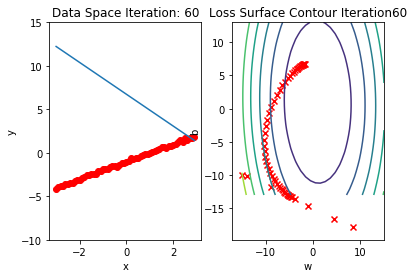

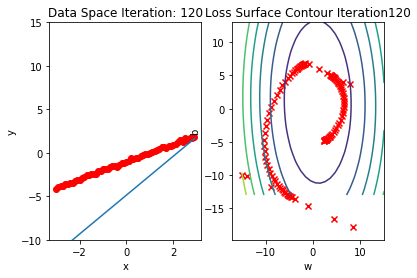

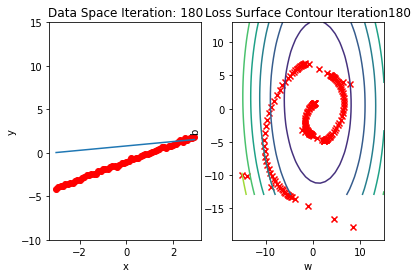

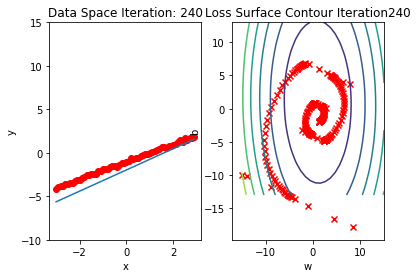

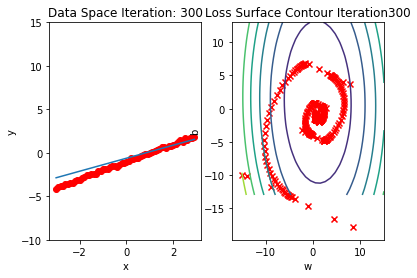

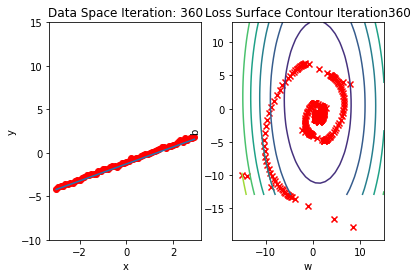

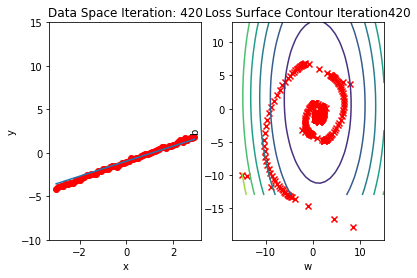

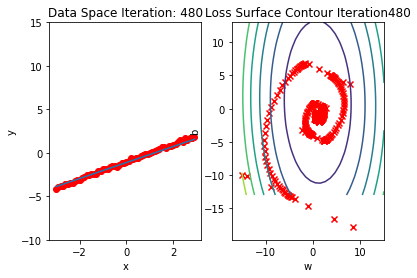

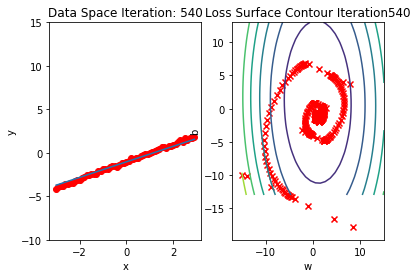

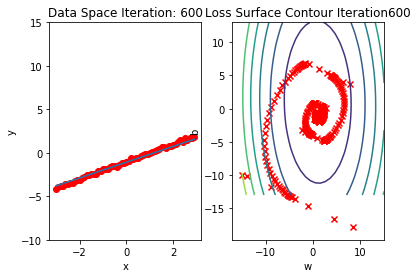

In [15]:
train_model_SGD(10)

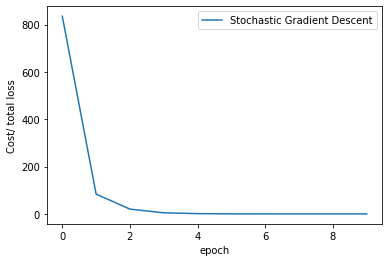

In [16]:
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [17]:
from torch.utils.data import Dataset, DataLoader

In [26]:
class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.y = 3*self.x+1
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
dataset = Data()

In [ ]:
print(dataset)
print(dataset.x)
print(dataset.y)

In [23]:
x,y = dataset[0]
print(x,y)

tensor([-3.]) tensor([-8.])


In [29]:
x,y = dataset[0:3]
print(x,y)

tensor([[-3.0000],
        [-2.9000],
        [-2.8000]]) tensor([[-8.0000],
        [-7.7000],
        [-7.4000]])


In [35]:
# can iterate the dataset directly but lets use a data loader
dataset = Data()
trainloader = DataLoader(dataset = dataset,batch_size=1)
LOSS_SGD1 =[]

In [37]:
##might be wrong
def train_model_SGDdl(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        LOSS_SGD1.append(criterion(Yhat, Y).tolist())
        for x,y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat,y)

            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

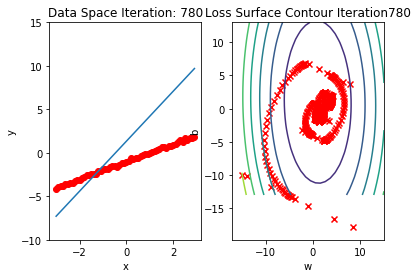

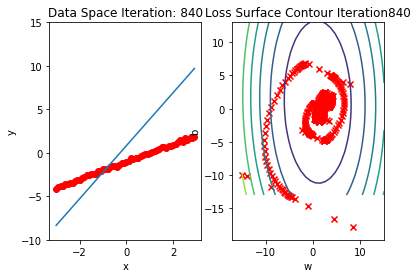

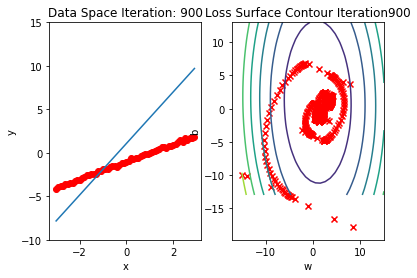

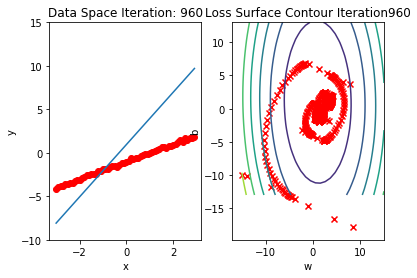

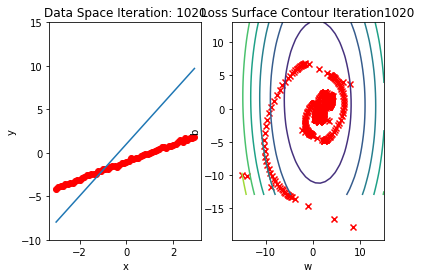

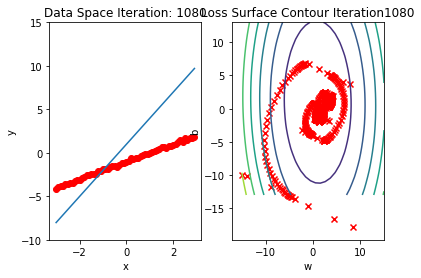

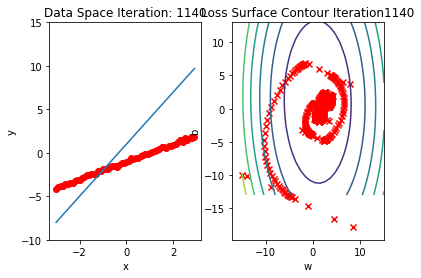

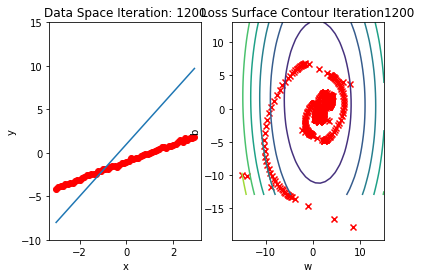

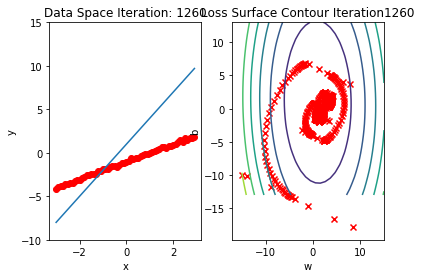

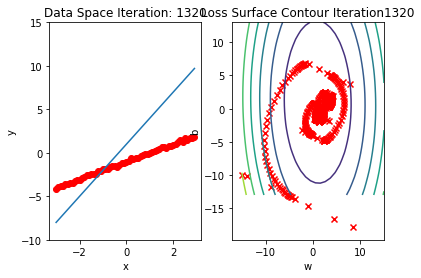

In [39]:
train_model_SGDdl(10)

## Mini-Batch Gradient Descent

In [44]:
# process large data set that cant hold in memory
# minimize the cost for each sample for each iteration
# iterations = training size/ batch size
dataset1 = Data()
loss12 = []
#print(dataset1.len)
trainloader = DataLoader(dataset=dataset1, batch_size = 5)

In [48]:
def train_model_SGDmb(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss12.append(criterion(Yhat, Y).tolist())
        for x,y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat,y)

            #get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())

            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            w.grad.data.zero_()
            b.grad.data.zero_()
        #get_surface.plot_ps()

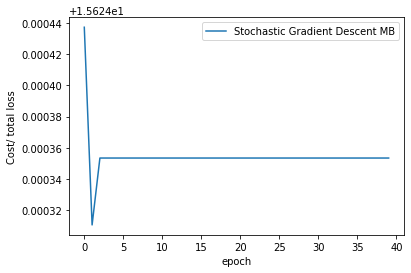

In [52]:
train_model_SGDmb(10)
plt.plot(loss12, label = "Stochastic Gradient Descent MB")
#plt.plot(LOSS_SGD,label ="other")
plt.plot()
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()